# A look at the latent drug space

In this notebook, I want to take a look at how the learned latent representations look like, do some summary statistics, some dimensionality reduction etc.

Vidhi sent me two new files with latent representations, I can take a look at them, and see how they compare

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap  # or just `import umap` depending on your version


In [2]:
latent = pd.read_csv('/Users/leiv/Downloads/drugs_latent_cancer.csv',index_col=0)
SMILES = latent.iloc[:,-1]
latent = latent.iloc[:,:-1] # Remove last column

# What if I just passed it iid normal data?
synthetic_latent = pd.DataFrame(
    np.random.randn(*latent.shape),
    columns=latent.columns
)

#latent = synthetic_latent

In [13]:
# Will do TSNE on it
tsne = TSNE(n_components=3, random_state=2222)
latent_embedded = tsne.fit_transform(latent)

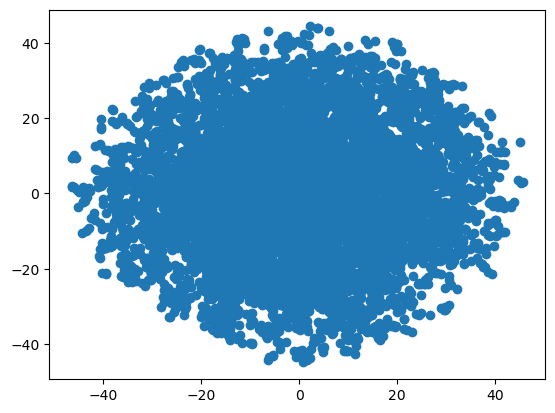

In [15]:
plt.scatter(latent_embedded[:, 0], latent_embedded[:, 1])
plt.show()

/Users/leiv/opt/anaconda3/envs/pimogp/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


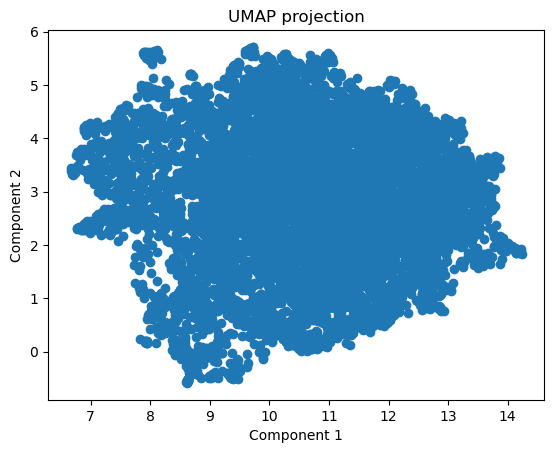

In [5]:
# Or a UMAP
latent_scaled = StandardScaler().fit_transform(latent)
reducer = umap.UMAP(random_state=2222)
latent_umap = reducer.fit_transform(latent_scaled)
plt.scatter(latent_umap[:, 0], latent_umap[:, 1])
plt.title("UMAP projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [6]:
# Now look at a PCA, and compute variance explained

In [7]:
latent_scaled = StandardScaler().fit_transform(latent)
pca = PCA()
latent_pca = pca.fit_transform(latent_scaled)

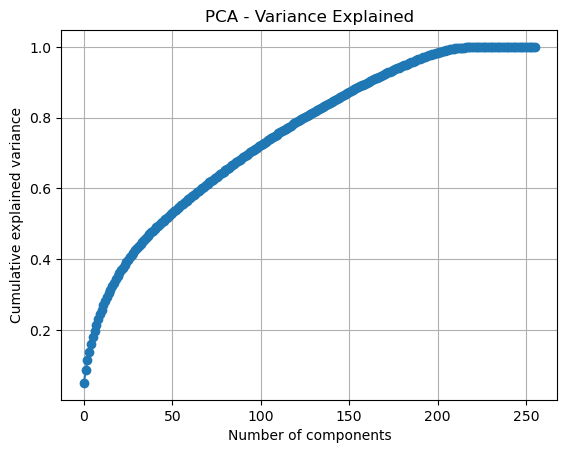

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA - Variance Explained')
plt.grid(True)
plt.show()

In [16]:
# Number of components to explain 95% variance
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.999) + 1
print(f"Number of components explaining ≥99% variance: {n_components_95}")

Number of components explaining ≥99% variance: 221


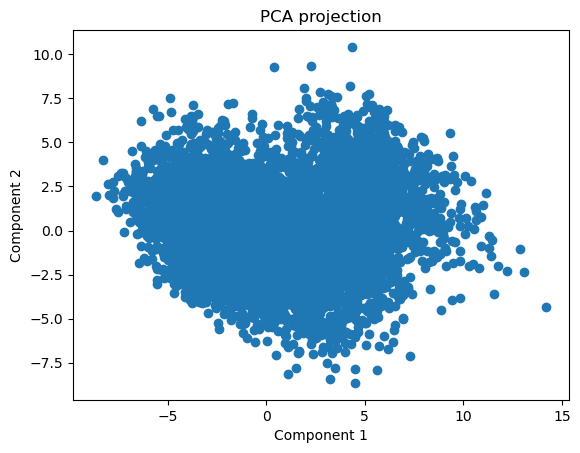

In [17]:
plt.scatter(latent_pca[:, 0], latent_pca[:, 4])
plt.title("PCA projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [30]:
# Now, I'll write these to file and tack on the SMILES again
df = pd.DataFrame(latent_pca[:,:n_components_95], columns=[f'latent_{i}' for i in range(latent_pca[:,:n_components_95].shape[1])])
df['SMILES'] = SMILES
df.to_csv('/Users/leiv/Downloads/cancer_latents_pca99.csv', index=False)


,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_17,latent_18,latent_19,latent_20,latent_21,latent_22,latent_23,latent_24,latent_25,SMILES
0,19.926848,2.233440,2.537888,-2.547682,3.322875,0.179134,3.032272,-1.712858,-0.096514,2.082907,...,0.145326,-0.103396,-0.052472,0.165224,-0.066739,0.194738,-0.250399,0.107551,0.179057,C[N+](C)(C)CCOP(=O)(O)O
1,23.129754,6.096189,2.344557,2.356942,3.797280,-1.815545,0.472648,-0.840891,1.540516,-0.072974,...,0.026036,-0.219858,-0.385186,0.752326,-0.340833,0.366878,0.048138,0.327883,-0.335127,C1=CC=NC(=C1)C(=O)O
2,-7.793281,-0.079882,-4.819853,3.218132,1.861358,-0.316639,1.137189,0.933181,-1.667888,-0.183336,...,0.515536,-0.270496,-0.008333,0.120109,0.006560,-0.243334,-0.058453,-0.123179,-0.139497,CCN(CC)CCCCNC1=NC2=NC(=C(C=C2C=N1)C3=CC(=CC(=C...
3,19.300680,4.824611,-0.933388,1.529696,1.401259,0.037927,3.099251,-2.326171,0.299668,1.437472,...,-0.132665,-0.133287,0.116024,-0.041963,-0.215669,0.140274,0.053524,0.084655,0.135456,C(CN)CNCCSP(=O)(O)O
4,-0.765939,-2.164520,-6.052979,1.850315,-1.075544,-2.042420,0.430381,-0.107526,-0.588925,-0.732527,...,0.112663,-0.167247,0.289334,0.028082,-0.111672,0.054512,0.042958,-0.145500,0.014065,CC(C)(C#N)C1=CC(=CC(=C1)CN2C=NC=N2)C(C)(C)C#N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7401,-2.737288,-0.191264,5.976981,-1.203972,0.107053,-2.300685,0.071411,0.658548,-1.109034,-2.262230,...,0.306989,-0.458595,-0.150166,0.052969,0.119009,0.180007,-0.396625,-0.062173,0.026974,C1=CC(=C(C=C1C(F)(F)F)Cl)OC2=CC(=C(C=C2)[N+](=...
7402,-6.943356,-2.143310,0.764533,-2.127995,1.917183,-1.698111,-2.000674,0.098628,0.459282,0.124208,...,0.352179,0.285638,0.012322,-0.158643,0.187247,-0.040429,0.069820,0.123864,-0.034221,CCC1CN2CCC3=CC(=C(C=C3C2CC1CC4C5=CC(=C(C=C5CCN...
7403,-2.901250,-5.276065,-4.750398,-3.581325,0.099747,1.522514,-0.352165,-0.183508,1.222857,-1.404730,...,-0.594658,-0.471839,0.046746,-0.159228,-0.274119,0.178201,0.081500,0.070782,0.069998,CC(C(=O)CF)NC(=O)C(CC1=CC=CC=C1)NC(=O)OCC2=CC=...
7404,0.245987,4.175484,4.541581,-1.071637,-0.829454,-2.076021,1.366744,0.432373,-0.654013,0.419345,...,0.063688,-0.066479,0.252024,-0.638056,0.264880,0.143672,-0.129760,-0.011084,-0.007132,C1=C2C(=NC=NN2C(=C1)C3(C(C(C(O3)CO)O)O)C#N)N


In [22]:
SMILES.

(7406,)